# Structure of a Star

Solving the differential equations that define an star.

\begin{equation*}
    \frac{dP}{dr} = -\frac{GM_r \rho}{r^2}
\end{equation*}

\begin{equation*}
    \frac{dM_r}{dr} = 4\pi r^2 \rho
\end{equation*}

\begin{equation*}
    \frac{dL_r}{dr} = 4\pi r^2 \rho \varepsilon
\end{equation*}

\begin{equation*}
    \frac{dT}{dr} = - \frac{3 \kappa L \rho}{ 64 \pi \sigma r^2T^3}
\end{equation*}

$
M_r : \text{ Mass from center until a radius r}
$

$
\rho(r) : \text{ density}
$

$
P(r) : \text{ Pressure at a radius r}
$

$
L(r) : \text{ Luminosity at a radius r}
$

$
T(r) : \text{ Temperature at a radius r}
$

$
\varepsilon : \text{ Rate of energy production}
$

$
\kappa : \text{ Opacity term}
$

## Importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Class Stellar Structure

In [14]:
class StellarStructure():

    def __init__(self, radius, rho, kappa, vareps):
        self.radius = radius
        self.rho = rho
        self.kappa = kappa
        self.varpes = vareps
    
    def discretizeSpace(self, N, bc):
        self.N = N
        # Discretize radius
        self.R = np.linspace(0, self.radius, N)
        # Discretize density
        self.Rho = self.rho(self.R)
        # Discretize pressure and set boundary condition
        self.P = np.zeros(N)
        self.P[N-1] = bc["ps"]
        # Discretize luminosity and set boundary condition
        self.L = np.zeros(N)
        self.L[0] = bc["lc"]
        # Discretize temperature and set boundary condition
        self.T = np.zeros(N)
        self.T[N-1] = bc["ts"]
        # Discretize mass and set boundary condition
        self.M = np.zeros(N)
        self.M[0] = bc["mc"]

    def forwardIntegrator(self, X, N, f, dx):
        for i in range(0, N-1):
            X[i+1] = X[i] + f(i)*dx
    
    def backwardIntegrator(self, X, N, f, dx):
        for i in range(N-1, 1, -1):
            X[i-1] = X[i] - f(i)*dx

    def integrateStellarEquations(self):

        dr = self.R[1] - self.R[0]

        def F_M(i):
            rho = self.Rho[i]
            r = self.R[i]
            f = 4*np.pi*rho*r**2
            return f
        self.forwardIntegrator(self.M, self.N, F_M, dr)

        def F_P(i):
            G = 6.67430e-11
            rho = self.Rho[i]
            r = self.R[i]
            m = self.M[i]
            f = -(G*m*rho)/(r**2)
            return f
        self.backwardIntegrator(self.P, self.N, F_P, dr)



    def exportDataFrame(self):
        dictionary = {
            'radius': self.R,
            'density': self.Rho,
            'mass': self.M,
            'pressure': self.P,
            'luminosity': self.L,
            'temperature': self.T
        }
        self.data = pd.DataFrame(dictionary)
    

## Parameters for solving the ODE

In [15]:
# Radius of the star
radius = 6.96e8
core_density = 1.6e4

# Density Function
def rho(r):
    # Density in the core of the Sun [kg][m]^-3
    core_density=1.6e4
    # Radius of the Sun [m]
    R = 6.96e8
    # Density at a raidus r [kg][m]^-3
    rho = core_density*(1 - (r/R)**2)
    return rho

# Opacity of the star
def kappa(T, rho):
    a=1
    c=1
    Lambda = 1
    k = (4*a*c*T**3)/(3*rho*Lambda)
    return k

# Rate of energy production
def varepsilon(r):
    return 1

# Boundary Conditions
boundary_conditions = {
    "mc": 0,
    "ps": 0,
    "lc": 0,
    "ts": 5772    
}

In [16]:
sun = StellarStructure(radius, rho, kappa, varepsilon)
sun.discretizeSpace(10000, boundary_conditions)
sun.integrateStellarEquations()
sun.exportDataFrame()
sun.data.head()

,radius,density,mass,pressure,luminosity,temperature
0,0.000000,16000.000000,0.000000e+00,0.000000e+00,0.0,0.0
1,69606.960696,15999.999840,0.000000e+00,6.931211e+15,0.0,0.0
2,139213.921392,15999.999360,6.780908e+19,6.931211e+15,0.0,0.0
3,208820.882088,15999.998560,3.390454e+20,6.931210e+15,0.0,0.0
4,278427.842784,15999.997439,9.493271e+20,6.931209e+15,0.0,0.0


## Control Panel

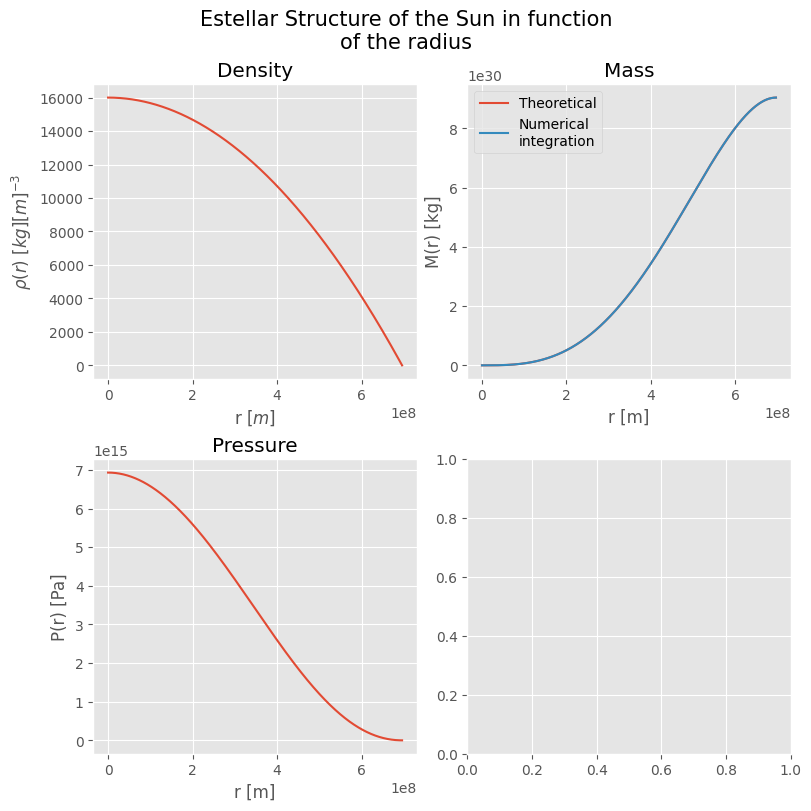

In [19]:
%matplotlib inline

fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

plt.style.use("ggplot")
plt.suptitle("Estellar Structure of the Sun in function\nof the radius", fontsize=15)

# DENSITY
ax[0,0].set_title("Density")
ax[0,0].plot(sun.R, sun.Rho)
ax[0,0].set_ylabel(r"$\rho(r)$ $[kg][m]^{-3}$")
ax[0,0].set_xlabel(r"r $[m]$")

# MASS
ax[0,1].set_title("Mass")
mass_theoretical = 4*np.pi*core_density*( sun.R**3/3 - sun.R**5/(5*radius**2))
ax[0,1].plot(sun.R, mass_theoretical, label='Theoretical')
ax[0,1].plot(sun.R, sun.M, label='Numerical\nintegration')
ax[0,1].set_ylabel("M(r) [kg]")
ax[0,1].set_xlabel("r [m]")
ax[0,1].legend()

# PRESSURE
ax[1,0].set_title("Pressure")
ax[1,0].plot(sun.R[1:], sun.P[1:])
ax[1,0].set_ylabel("P(r) [Pa]")
ax[1,0].set_xlabel("r [m]")

#fig.supxlabel("Radius [m]")

plt.show()